# Moral2Vec：Measurement of Morality with Embedding
## 项目背景
由于现有的文本道德测量主要基于词典，如道德基础词典等只能对特定的道德词汇进行定类的分析。部分方法通过采用人工标注+机器学习的方式实现了道德词语在特定维度下道德强度的定量（如MoralStrength）等，但这种方式也局限于词表范围内的词汇。由于语义投影能够从词嵌入中还原丰富的语境知识，本项目认为，词嵌入技术也能够为文本中的道德测量提供一种有效的方式。
## 语义投影十分适用于道德基础理论
语义投影指的是将词向量“语义投影”到表示诸如大小（连接词“小”和“大”的线）或危险（“安全”到“危险”）等特征的线上，这条线的两端需要是同一个概念（大小）的两个极值，而道德基础理论中每一个维度都由“美德”与“恶习”构成，这使得语义投影十分适用于道德基础理论，从而可以对文本的道德进行广泛的测量。
## 研究思路
首先，从预训练的词向量模型中挑选出对应的两组“美德”和“恶习”词，将其重心的连线作为这一维度道德的语义投影；其次，找到一组人类标注的道德词及其强度数据，将这些词映射到语义投影下，检验其大小关系是否能还原人类知识。在能够还原单词道德的基础上，尝试如何对句子、文章的道德进行更加高效、科学的测量。
## 相关资源
### 中文词向量资源
https://github.com/Embedding/Chinese-Word-Vectors
### 中文道德基础词典CMFD
https://github.com/CivicTechLab/CMFD
### 英文词向量资源
https://nlp.stanford.edu/projects/glove/
### MoralStrength
https://github.com/oaraque/moral-foundations

---

# 先使用最熟悉的中文
## 相关库的导入

In [1]:
import pandas as pd
import numpy as np

In [2]:
import cmfd
import jieba as jb

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/7d/507_52mn2sv4475h6l1k244c0000gn/T/jieba.cache
Loading model cost 0.364 seconds.
Prefix dict has been built successfully.
/Users/fanhongrui/anaconda3/lib/python3.11/site-packages/cmfd/utils.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for category, df_item in df.groupby(by=['foundation']):


In [2]:
cmfd.get_moral_dict()

{'altr': ['万人之敌',
  '不畏强暴',
  '义勇',
  '义愤填胸',
  '义无反顾',
  '作战英勇',
  '侠肝义胆',
  '共享',
  '冲锋',
  '冲锋陷阵',
  '出生入死',
  '利他',
  '利他主义',
  '勇为',
  '勇于',
  '勇于开拓',
  '勇于开拓创新',
  '勇于探索',
  '勇于献身',
  '勇士',
  '勇往直前',
  '勇悍',
  '勇救',
  '勇敢',
  '勇敢善战',
  '勇敢坚定',
  '勇敢无畏',
  '勇敢果断',
  '勇斗歹徒',
  '勇武',
  '勇气',
  '勇猛',
  '勇猛善战',
  '勇猛无敌',
  '勇赴',
  '可欺',
  '善行义举',
  '因公殉职',
  '大公无私',
  '大智大勇',
  '奋不顾身',
  '奋勇',
  '奋勇争先',
  '奋勇作战',
  '奋勇前行',
  '奋勇当先',
  '奋战',
  '威武不屈',
  '弱不禁风',
  '忠诚勇敢',
  '慷慨赴义',
  '成仁取义',
  '战斗者',
  '抱头鼠窜',
  '排头兵',
  '支教',
  '斗志',
  '斗志昂扬',
  '无畏的勇气',
  '无私',
  '智勇双全',
  '果敢',
  '武勇',
  '殊死',
  '殒身不恤',
  '烈士',
  '独胆',
  '献出',
  '献血',
  '粉身碎骨',
  '舍己',
  '舍己救人',
  '舍身取义',
  '英勇',
  '英勇不屈',
  '英勇善战',
  '英勇壮举',
  '英勇奋斗',
  '英勇无比',
  '英勇无畏',
  '英勇果敢',
  '英雄主义',
  '行侠仗义',
  '见义勇为',
  '骁勇'],
 'auth': ['一呼百诺',
  '一字之师',
  '一把手',
  '一言九鼎',
  '万代',
  '万户侯',
  '万马齐喑',
  '丈人',
  '三个代表',
  '三从四德',
  '三反',
  '三反运动',
  '三民主义',
  '三法司',
  '三皇',
  '三皇五帝',
  '三纲五常',
  '三藏法师',
  '三藩之乱',
  '上交',
  '上司

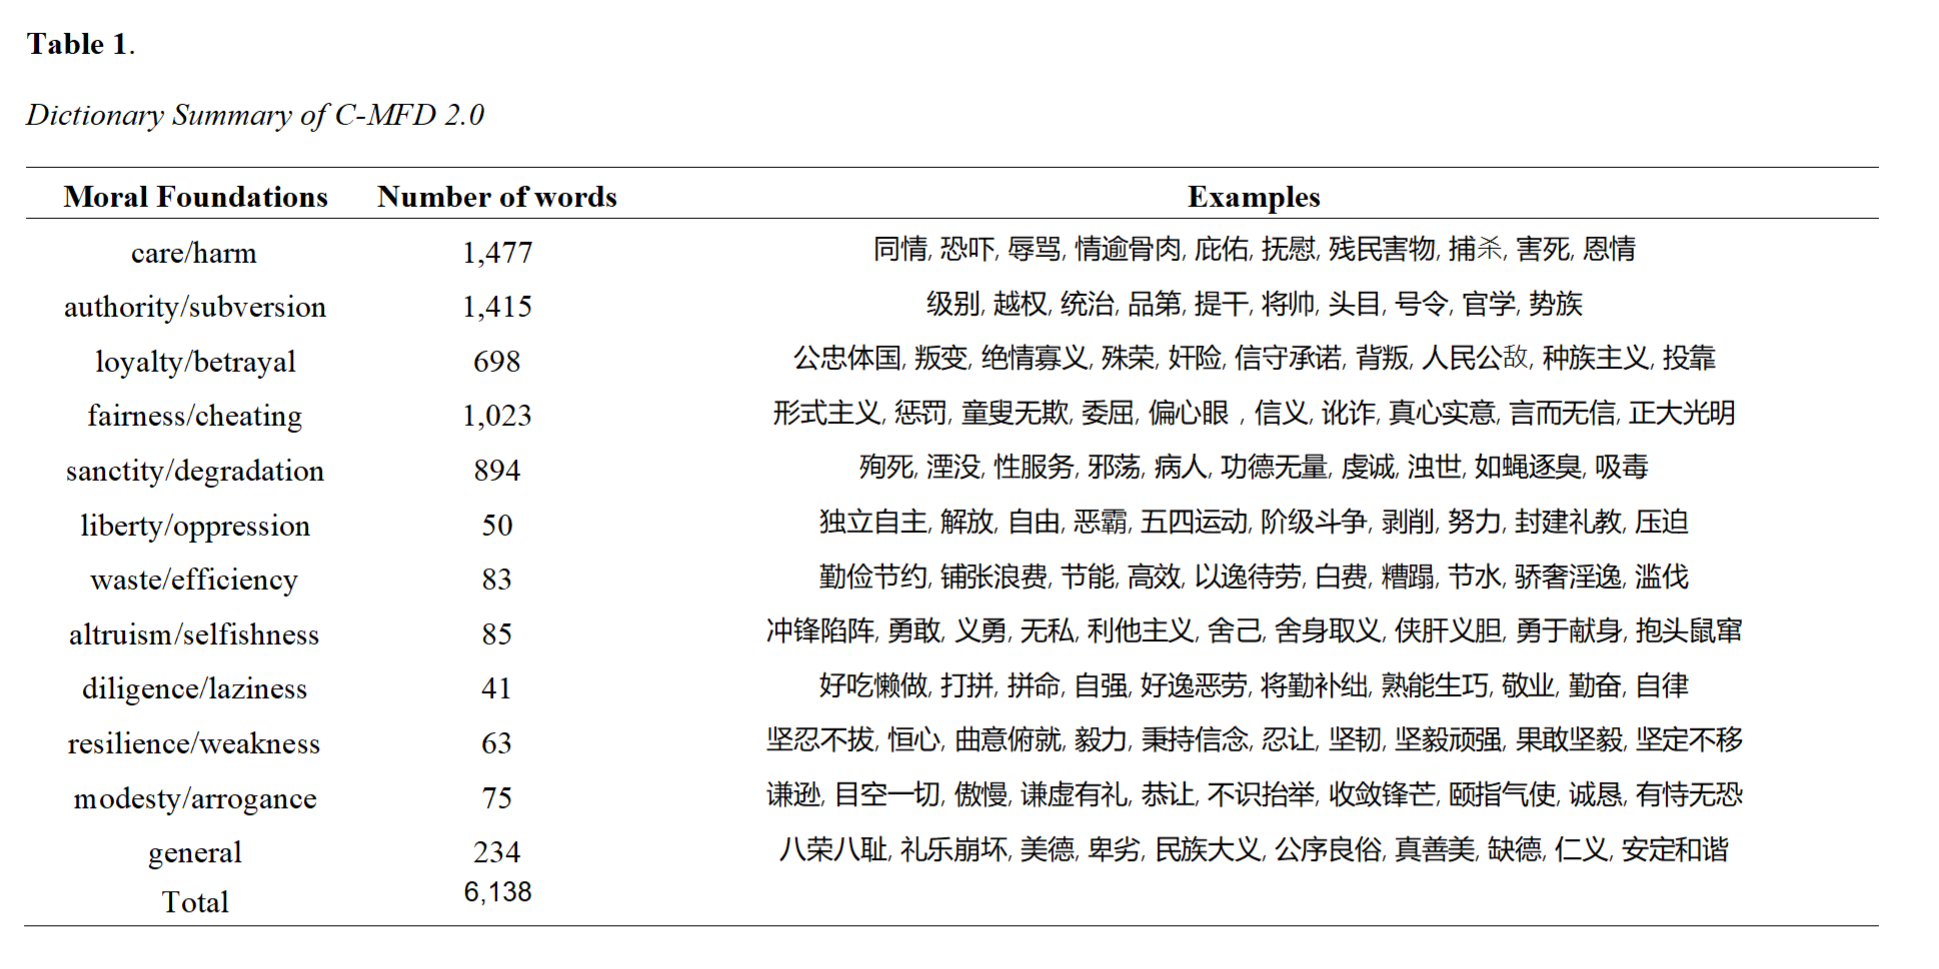

In [3]:
mdict = cmfd.get_moral_dict()

In [4]:
mdict.keys()

dict_keys(['altr', 'auth', 'care', 'dili', 'fair', 'general', 'libe', 'loya', 'mode', 'resi', 'sanc', 'wast'])

In [5]:
len(mdict['altr'])

85

## 导入文本文件作为案例

In [6]:
with open ('./example.txt') as f:
    sample_text = f.readlines()
    
sample_text

['原标题：着力打造高水平青年科技人才队伍\n',
 '\u3000\u3000青年兴则国家兴，青年强则国家强。近日印发的《关于进一步加强青年科技人才培养和使用的若干措施》（以下简称《若干措施》），是专门针对青年科技人才培养和使用的系统性规划，为打造一支高水平青年科技人才队伍指明方向。\n',
 '\n',
 '\u3000\u3000青年时期是科研的黄金阶段，青年人才蕴藏着巨大的创新潜力。习近平总书记高度重视青年科技人才队伍建设，多次提到青年科技人才在科技创新和科研攻关中的重要地位，强调“青年人才是国家战略人才力量的源头活水”“要把培育国家战略人才力量的政策重心放在青年科技人才上，给予青年人才更多的信任、更好的帮助、更有力的支持，支持青年人才挑大梁、当主角”。党的二十大报告和中共中央政治局第三次集体学习都突出强调了青年科技人才问题。\n',
 '\n',
 '\u3000\u3000通过不断创新培养模式和组织模式，我国青年科技人才已成为国家科技战略的重要先锋。复兴号高铁设计研发团队平均年龄38岁；北斗卫星核心团队平均年龄36岁；“中国天眼”研发团队平均年龄仅30岁……青年科技人才聚焦基础研究和国民经济领域重要科学问题，积极承担国家级重大项目，取得一系列创新成果，有力支撑了国家战略科技力量发展和科技强国建设。\n',
 '\n',
 '\u3000\u3000面对世界百年未有之大变局，科技创新在大国竞争中的作用越发凸显。立足中华民族伟大复兴战略全局和实现我国高水平科技自立自强的实践蓝图，全方位培养和使用好青年科技人才是我国构建战略科技力量、解决当下关键核心技术“卡脖子”难题的重要抓手。同时也应看到，我国青年科技人才存在担纲机会少、成长通道窄、生活压力大等问题。《若干措施》正是针对这些阻碍青年科技人才队伍发展壮大的痛点和难点，着力破解当前青年科技人才成长与发展过程中的共性问题。\n',
 '\n',
 '\u3000\u3000从加强思想政治引领到加大生活服务保障力度；从加大对职业早期青年科技人才稳定支持力度到完善博士后机制；从支持青年科技人才在国家重大科技任务中“挑大梁”“当主角”，到国家科技创新基地要大力培养使用青年科技人才……《若干措施》涵盖青年科技人才培养和使用的全链条，既有原则性方针，也有量化要求，注重务实管用，具有很强的操作性。\n',
 '\n',
 '

In [7]:
sample_text[0]

'原标题：着力打造高水平青年科技人才队伍\n'

## 使用语义投影方法捕捉语言的道德性*

In [8]:
#分词
sample_tokens = []
for i in sample_text:
    cut = jb.lcut(i)
    for j in cut:
        sample_tokens.append(j)

In [9]:
sample_tokens

['原',
 '标题',
 '：',
 '着力',
 '打造',
 '高水平',
 '青年',
 '科技',
 '人才队伍',
 '\n',
 '\u3000',
 '\u3000',
 '青年',
 '兴则',
 '国家',
 '兴',
 '，',
 '青年',
 '强则',
 '国家',
 '强',
 '。',
 '近日',
 '印发',
 '的',
 '《',
 '关于',
 '进一步',
 '加强',
 '青年',
 '科技',
 '人才培养',
 '和',
 '使用',
 '的',
 '若干',
 '措施',
 '》',
 '（',
 '以下',
 '简称',
 '《',
 '若干',
 '措施',
 '》',
 '）',
 '，',
 '是',
 '专门',
 '针对',
 '青年',
 '科技',
 '人才培养',
 '和',
 '使用',
 '的',
 '系统性',
 '规划',
 '，',
 '为',
 '打造',
 '一支',
 '高水平',
 '青年',
 '科技',
 '人才队伍',
 '指明方向',
 '。',
 '\n',
 '\n',
 '\u3000',
 '\u3000',
 '青年',
 '时期',
 '是',
 '科研',
 '的',
 '黄金',
 '阶段',
 '，',
 '青年',
 '人才',
 '蕴藏',
 '着',
 '巨大',
 '的',
 '创新',
 '潜力',
 '。',
 '习近平',
 '总书记',
 '高度重视',
 '青年',
 '科技',
 '人才队伍',
 '建设',
 '，',
 '多次',
 '提到',
 '青年',
 '科技人才',
 '在',
 '科技',
 '创新',
 '和',
 '科研',
 '攻关',
 '中',
 '的',
 '重要',
 '地位',
 '，',
 '强调',
 '“',
 '青年',
 '人才',
 '是',
 '国家',
 '战略',
 '人才',
 '力量',
 '的',
 '源头活水',
 '”',
 '“',
 '要',
 '把',
 '培育',
 '国家',
 '战略',
 '人才',
 '力量',
 '的',
 '政策',
 '重心',
 '放在',
 '青年',
 '科技人才',
 '上',
 '，',
 '给予',
 '青年',
 '人才',
 

In [10]:
import re
 
def find_chinese(file):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')
    chinese = re.sub(pattern, '', file)
    return chinese

In [11]:
tokens = []
for i in sample_tokens:
    if find_chinese(i):
        tokens.append(find_chinese(i))

In [12]:
tokens[:10]

['原', '标题', '着力', '打造', '高水平', '青年', '科技', '人才队伍', '青年', '兴则']

In [13]:
#词向量资源
#这里加载的是Mixed-large 综合词向量
from gensim.models.keyedvectors import KeyedVectors

mix_wv = KeyedVectors.load_word2vec_format('../数据资源/sgns.merge.word.bz2', 
                                             binary=False, 
                                             unicode_errors='ignore')

In [16]:
# import matplotlib.pyplot as plt
# import matplotlib
# import platform
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')
# # 以下代码从全局设置字体为SimHei（黑体），解决显示中文问题【Windows】
# # 设置font.sans-serif 或 font.family 均可
# plt.rcParams['font.sans-serif'] = ['SimHei']
# # plt.rcParams['font.family']=['SimHei']
# # 解决中文字体下坐标轴负数的负号显示问题
# plt.rcParams['axes.unicode_minus'] = False 

In [17]:
# 获取一组端点词汇
care_points = [i[0] for i in mix_wv.most_similar('关心')[:3]]
hate_points = [i[0] for i in mix_wv.most_similar('伤害')[:3]]

In [27]:
care_points

['关注', '十分关心', '关切']

In [18]:
# 清除掉不在词向量空间中的词
tokens2 = []
for i in tokens:
    if i in mix_wv:
        tokens2.append(i)

tokens = tokens2

In [19]:
tokens

['原',
 '标题',
 '着力',
 '打造',
 '高水平',
 '青年',
 '科技',
 '人才队伍',
 '青年',
 '兴则',
 '国家',
 '兴',
 '青年',
 '强则',
 '国家',
 '强',
 '近日',
 '印发',
 '的',
 '关于',
 '进一步',
 '加强',
 '青年',
 '科技',
 '人才培养',
 '和',
 '使用',
 '的',
 '若干',
 '措施',
 '以下',
 '简称',
 '若干',
 '措施',
 '是',
 '专门',
 '针对',
 '青年',
 '科技',
 '人才培养',
 '和',
 '使用',
 '的',
 '系统性',
 '规划',
 '为',
 '打造',
 '高水平',
 '青年',
 '科技',
 '人才队伍',
 '指明方向',
 '青年',
 '时期',
 '是',
 '科研',
 '的',
 '黄金',
 '阶段',
 '青年',
 '人才',
 '蕴藏',
 '着',
 '巨大',
 '的',
 '创新',
 '潜力',
 '习近平',
 '总书记',
 '高度重视',
 '青年',
 '科技',
 '人才队伍',
 '建设',
 '多次',
 '提到',
 '青年',
 '科技人才',
 '在',
 '科技',
 '创新',
 '和',
 '科研',
 '攻关',
 '中',
 '的',
 '重要',
 '地位',
 '强调',
 '青年',
 '人才',
 '是',
 '国家',
 '战略',
 '人才',
 '力量',
 '的',
 '源头活水',
 '要',
 '把',
 '培育',
 '国家',
 '战略',
 '人才',
 '力量',
 '的',
 '政策',
 '重心',
 '放在',
 '青年',
 '科技人才',
 '上',
 '给予',
 '青年',
 '人才',
 '更',
 '多',
 '的',
 '信任',
 '更好',
 '的',
 '帮助',
 '更',
 '有力',
 '的',
 '支持',
 '支持',
 '青年',
 '人才',
 '挑大梁',
 '当',
 '主角',
 '党',
 '的',
 '报告',
 '和',
 '中共中央政治局',
 '集体',
 '学习',
 '都',
 '突出',
 '强调',
 '了',
 '青

In [20]:
# 取一些词来做测试
words = tokens[:10]

In [21]:
# 获取词向量，并转换为 NumPy 数组
vectors = np.array([mix_wv[word] for word in words])

# 把关心-伤害 作为特征子空间
x_axis = mix_wv[care_points].mean(axis=0) - mix_wv[hate_points].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)

for i, word in enumerate(words):
    print(word, x_coords[i])

原 0.09421605
标题 0.64831585
着力 3.021131
打造 1.0393301
高水平 1.0468478
青年 1.4610043
科技 1.412972
人才队伍 3.1747425
青年 1.4610043
兴则 1.413707


In [22]:
# 看不出具体的情况，换成道德词典中的词试一试
care_dict = cmfd.get_moral_dict()['care']

In [23]:
# 清除掉不在词向量空间中的词
tokens2 = []
for i in care_dict:
    if i in mix_wv:
        tokens2.append(i)

care_dict = tokens2

In [24]:
words = care_dict[:10]

In [25]:
# 获取词向量，并转换为 NumPy 数组
vectors = np.array([mix_wv[word] for word in words])

# 把关心-伤害 作为特征子空间
x_axis = mix_wv[care_points].mean(axis=0) - mix_wv[hate_points].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)

for i, word in enumerate(words):
    print(word, x_coords[i])

同情 1.9674611
一臂之力 0.5362199
一见倾心 -0.36296773
三个代表 1.8957658
不为已甚 -1.2490273
不仁 -3.7472453
不以为然 1.0119443
不伤脾胃 -0.9856337
不共戴天 -0.09252086
不啻 -0.57068586


In [26]:
# 把所有微博词向量中存在的关心维度词语都算出一个投影
vectors = np.array([mix_wv[word] for word in care_dict])

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)

care_df = pd.DataFrame({'word':care_dict,
                       'value':x_coords.tolist()})

In [27]:
care_df.sort_values(by='value')

,word,value
799,灭失,-5.896487
1194,损害,-5.841596
252,受伤害,-5.526436
1010,被害人,-4.913926
90,伤害,-4.872258
...,...,...
780,深情厚意,4.351616
1170,慰问,4.675823
1121,问候,4.745451
1179,关心,4.942179


In [28]:
# 标准化
from scipy import stats
care_df['value_zscore'] = stats.zscore(care_df['value'])

In [29]:
care_df.sort_values(by='value_zscore')

,word,value,value_zscore
799,灭失,-5.896487,-3.386778
1194,损害,-5.841596,-3.350541
252,受伤害,-5.526436,-3.142488
1010,被害人,-4.913926,-2.738140
90,伤害,-4.872258,-2.710633
...,...,...,...
780,深情厚意,4.351616,3.378508
1170,慰问,4.675823,3.592533
1121,问候,4.745451,3.638498
1179,关心,4.942179,3.768368


In [30]:
# 看一看最中间的一些词汇
care_df.sort_values(by='value_zscore').iloc[620:630]

,word,value,value_zscore
1092,送医,-0.759832,0.004186
75,仁民爱物,-0.759737,0.004248
590,拯救,-0.759108,0.004664
875,相让,-0.755307,0.007173
250,发痛,-0.754759,0.007534
945,胃疼,-0.753692,0.008239
1065,贩毒,-0.752817,0.008816
516,惨无人道,-0.752272,0.009176
50,争战,-0.751395,0.009755
402,宽仁,-0.747276,0.012474


## 简单的方式效果不佳
像“惨无人道”这样的词语按道理应该和“伤害”很相近，“拯救”这样的词在“关心”层面的价值应该也很高，但在这种方式处理之下它们混杂在中间区域。

# 试图改进
只用“关心”及其近义词减去“伤害”及其近义词，不太具有代表性，试图选取多个“关心”、“伤害”维度的词语。但是CMFD并没有将词汇细分到那么具体，所以用英文的来试一试。

In [32]:
# pip install moralstrength

In [3]:
import moralstrength

In [4]:
moralstrength.get_available_lexicon_traits()

['care', 'fairness', 'loyalty', 'authority', 'purity']

In [11]:
care_anot = pd.read_csv('./annotations/MoralStrength/care.tsv',sep='\t')

In [12]:
care_anot

,WORD,EXPRESSED_MORAL
0,abandon,1.60
1,abandoned,1.60
2,abandoning,1.60
3,abuse,2.50
4,abusers,2.50
...,...,...
449,wounds,2.20
450,wreck,1.75
451,wrecked,1.75
452,wrecking,1.75


In [13]:
care_anot.sort_values(by='EXPRESSED_MORAL')

,WORD,EXPRESSED_MORAL
28,assasins,1.0
230,killer,1.0
29,assassin,1.0
31,assassination,1.0
196,hitman,1.0
...,...,...
396,suzerain,8.8
391,strongbox,8.8
378,sove-,8.8
435,viscountcy,8.8


<Axes: >

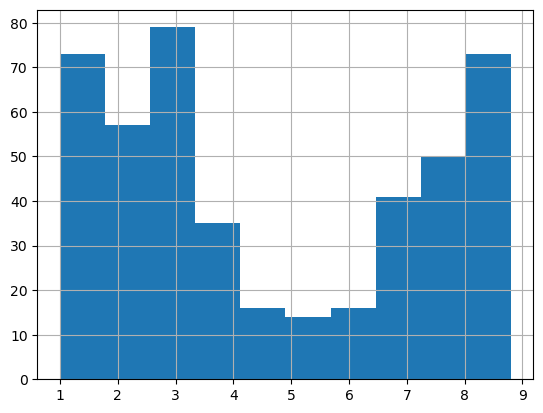

In [14]:
care_anot['EXPRESSED_MORAL'].hist()

## 如何构建语义空间？
### 思路一
以5分为分界线，左右两侧的词语在词向量中分别确定两个点，连接起来。其中，偏离5的程度是每个词的权重。
### 思路二
只选取最极端的两组词（1和8.8），求平均后连接起来；把中间的词作为测试用例，看这些词在语义空间上的排序情况。

## 先引入英文词向量

In [9]:
# # 将glove模型转换成gensim方便加载的格式(gensim支持word2vec格式的预训练模型格式）
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = '../数据资源/glove.840B.300d.txt'
# word2vec_output_file = '../数据资源/glove.840B.300d.word2vec.txt'
# (count, dimensions) = glove2word2vec(glove_input_file, word2vec_output_file)
# print(count, '\n', dimensions)

### debug备注
这个count的行数并不等于词数，而是词数+1，所以需要到导出的txt中把第一行的2096017改成2096016，不然读取会出错

In [10]:
from gensim.models import KeyedVectors

# 加载模型
glove_model = KeyedVectors.load_word2vec_format('../数据资源/glove.840B.300d.word2vec.txt', binary=False)

In [15]:
glove_model.most_similar('care')

[('health', 0.7470958232879639),
 ('healthcare', 0.7208758592605591),
 ('medical', 0.6663292646408081),
 ('caring', 0.663437008857727),
 ('Care', 0.6412802934646606),
 ('nursing', 0.6411818861961365),
 ('needs', 0.6362321972846985),
 ('hospital', 0.6324393153190613),
 ('patient', 0.6106269359588623),
 ('hospitals', 0.5972602367401123)]

In [16]:
glove_model.most_similar('harm')

[('harms', 0.7862549424171448),
 ('harming', 0.7627426981925964),
 ('harmed', 0.730241060256958),
 ('detrimental', 0.7148556113243103),
 ('consequences', 0.713196873664856),
 ('harmful', 0.6967549920082092),
 ('endanger', 0.6950823068618774),
 ('damaging', 0.6922056674957275),
 ('danger', 0.6634793877601624),
 ('injure', 0.6578567624092102)]

### 选取最极端的两组词来做语义投影

In [17]:
care_points = care_anot[care_anot.EXPRESSED_MORAL==8.8].WORD.tolist()

In [18]:
harm_points = care_anot[care_anot.EXPRESSED_MORAL==1].WORD.tolist()

In [19]:
token = []
for i in care_points:d
    if i in glove_model:
        token.append(i)
        
care_points=token

In [20]:
token = []
for i in harm_points:
    if i in glove_model:
        token.append(i)
        
harm_points=token

In [21]:
harm_points

['assasins',
 'assassin',
 'assassination',
 'bang',
 'banged',
 'banging',
 'buck',
 'decimate',
 'destory',
 'destroy',
 'destroyed',
 'destroying',
 'devastate',
 'hitman',
 'killer',
 'murderer',
 'obliterate']

In [22]:
care_points

['appanage',
 'belongings',
 'careand',
 'custodianship',
 'depository',
 'overlordship',
 'protectorship',
 'safekeep',
 'safekeeping',
 'strongbox',
 'suzerain',
 'suzerainty',
 'transferral',
 'viscountcy',
 'wardenship']

In [23]:
# 取一些词来做测试
test_words = care_anot.sample(20).reset_index(drop=True)
test_words

,WORD,EXPRESSED_MORAL
0,self-dignity,7.000000
1,hurted,2.285714
2,collateralizing,3.833333
3,peacenik,6.400000
4,exploitable,2.833333
5,pacifist,6.400000
6,decapitate,1.600000
7,pro-trade,8.200000
8,sover-,8.800000
9,wounds,2.200000


In [24]:
# 删除这些词当中不在glove空间中的词
test_words['isinglove'] = test_words.WORD.apply(lambda x: (x in glove_model)+0)

In [25]:
test_words = test_words[test_words.isinglove==1][['WORD','EXPRESSED_MORAL']].reset_index(drop=True)

In [26]:
test_words

,WORD,EXPRESSED_MORAL
0,self-dignity,7.000000
1,hurted,2.285714
2,collateralizing,3.833333
3,peacenik,6.400000
4,exploitable,2.833333
5,pacifist,6.400000
6,decapitate,1.600000
7,pro-trade,8.200000
8,wounds,2.200000
9,threatened,4.600000


In [27]:
# 获取词向量，并转换为 NumPy 数组
vectors = np.array([glove_model[word] for word in test_words.WORD.tolist()])

# 把关心-伤害 作为特征子空间
x_axis = glove_model[care_points].mean(axis=0) - glove_model[harm_points].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)

for i, word in enumerate(test_words.WORD.tolist()):
    print(word, x_coords[i])

self-dignity 12.603652
hurted 4.5506744
collateralizing 14.0646305
peacenik 4.1873064
exploitable 0.099453
pacifist -1.8056507
decapitate -4.7479987
pro-trade 6.3336897
wounds -7.625246
threatened -8.834862
protecters 11.9471855
stomp -8.41986
unsettling -3.797241
savage -10.367439
defense -9.647189
obliteration 0.63547134
benefited -0.60177755
assassination -10.115679
kindness -2.536071


In [28]:
test_words['coord'] = x_coords

In [29]:
# 将得分映射到[-1,+1]
test_words['EXPRESSED_MORAL'] = test_words['EXPRESSED_MORAL'].apply(lambda x: (x-4.9)/3.9)

In [30]:
test_words

,WORD,EXPRESSED_MORAL,coord
0,self-dignity,0.538462,12.603652
1,hurted,-0.670330,4.550674
2,collateralizing,-0.273504,14.064631
3,peacenik,0.384615,4.187306
4,exploitable,-0.529915,0.099453
5,pacifist,0.384615,-1.805651
6,decapitate,-0.846154,-4.747999
7,pro-trade,0.846154,6.333690
8,wounds,-0.692308,-7.625246
9,threatened,-0.076923,-8.834862


In [31]:
test_words.corr()

/var/folders/7d/507_52mn2sv4475h6l1k244c0000gn/T/ipykernel_46998/1314013906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_words.corr()


,EXPRESSED_MORAL,coord
EXPRESSED_MORAL,1.000000,0.515614
coord,0.515614,1.000000


In [32]:
import scipy

In [33]:
scipy.stats.spearmanr(test_words['EXPRESSED_MORAL'],test_words['coord']) 

SignificanceResult(statistic=0.4619467572372838, pvalue=0.04646424931399479)

## 把所有单词都拿出来做对比试试

In [34]:
care_anot

,WORD,EXPRESSED_MORAL
0,abandon,1.60
1,abandoned,1.60
2,abandoning,1.60
3,abuse,2.50
4,abusers,2.50
...,...,...
449,wounds,2.20
450,wreck,1.75
451,wrecked,1.75
452,wrecking,1.75


In [37]:
authority_anot = pd.read_csv('./annotations/MoralStrength/authority.tsv',sep='\t')
fairness_anot = pd.read_csv('./annotations/MoralStrength/fairness.tsv',sep='\t')
loyalty_anot = pd.read_csv('./annotations/MoralStrength/loyalty.tsv',sep='\t')
purity_anot = pd.read_csv('./annotations/MoralStrength/purity.tsv',sep='\t')

array([[<Axes: title={'center': 'EXPRESSED_MORAL'}>]], dtype=object)

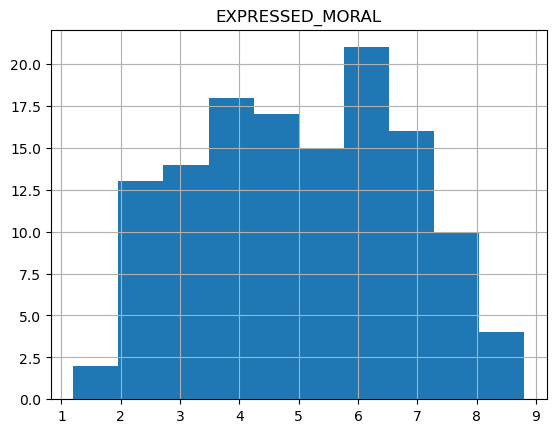

In [38]:
authority_anot.hist()

In [62]:
authority_anot.sort_values(by='EXPRESSED_MORAL')[-5:]

,LEMMA,EXPRESSED_MORAL
17,control,8.000000
5,authoritarian,8.200000
55,law,8.666667
7,authority,8.800000
58,leadership,8.800000


In [63]:
authority_head = authority_anot.sort_values(by='EXPRESSED_MORAL')[-5:].LEMMA.tolist()
authority_tail = authority_anot.sort_values(by='EXPRESSED_MORAL')[:5].LEMMA.tolist()

fairness_head = fairness_anot.sort_values(by='EXPRESSED_MORAL')[-5:].LEMMA.tolist()
fairness_tail = fairness_anot.sort_values(by='EXPRESSED_MORAL')[:5].LEMMA.tolist()

loyalty_head = loyalty_anot.sort_values(by='EXPRESSED_MORAL')[-5:].LEMMA.tolist()
loyalty_tail = loyalty_anot.sort_values(by='EXPRESSED_MORAL')[:5].LEMMA.tolist()

purity_head = purity_anot.sort_values(by='EXPRESSED_MORAL')[-5:].LEMMA.tolist()
purity_tail = purity_anot.sort_values(by='EXPRESSED_MORAL')[:5].LEMMA.tolist()

In [112]:
#就你搞特殊
care_head = care_anot.sort_values(by='EXPRESSED_MORAL')[-5:].WORD.tolist()
care_tail = care_anot.sort_values(by='EXPRESSED_MORAL')[:5].WORD.tolist()

In [47]:
def createLine(head,tail):
    h = []
    t = []
    for i in head:
        if i in glove_model:
            h.append(i)
    for i in tail:
        if i in glove_model:
            t.append(i)
    # 建立特征子空间
    x_axis = glove_model[h].mean(axis=0) - glove_model[t].mean(axis=0)
    
    return x_axis

In [70]:
def projection(word, line):
    if word in glove_model:
        vector = np.array(glove_model[word])
        # 计算词向量在新坐标系中的投影
        x_coord = np.dot(vector, line)
        return x_coord
    else:
        return None

In [64]:
authority_line = createLine(authority_head,authority_tail)

In [71]:
authority_anot['projection'] = authority_anot.apply(lambda x: projection(x['LEMMA'],authority_line), axis=1)

In [113]:
fairness_line = createLine(fairness_head,fairness_tail)
loyalty_line = createLine(loyalty_head,loyalty_tail)
purity_line = createLine(purity_head,purity_tail)
care_line = createLine(care_head,care_tail)

In [114]:
fairness_anot['projection'] = fairness_anot.apply(lambda x: projection(x['LEMMA'],fairness_line), axis=1)
loyalty_anot['projection'] = loyalty_anot.apply(lambda x: projection(x['LEMMA'],loyalty_line), axis=1)
purity_anot['projection'] = purity_anot.apply(lambda x: projection(x['LEMMA'],purity_line), axis=1)
care_anot['projection'] = care_anot.apply(lambda x: projection(x['WORD'],care_line), axis=1)

In [108]:
scipy.stats.spearmanr(authority_anot.dropna()['EXPRESSED_MORAL'],authority_anot.dropna()['projection']) 

SignificanceResult(statistic=0.6320386167087008, pvalue=2.077772054488501e-15)

In [109]:
scipy.stats.spearmanr(fairness_anot.dropna()['EXPRESSED_MORAL'],fairness_anot.dropna()['projection']) 

SignificanceResult(statistic=0.6939495503307731, pvalue=3.816356592099316e-11)

In [110]:
scipy.stats.spearmanr(purity_anot.dropna()['EXPRESSED_MORAL'],purity_anot.dropna()['projection']) 

SignificanceResult(statistic=0.6103731939669005, pvalue=3.4885110535946727e-13)

In [111]:
scipy.stats.spearmanr(loyalty_anot.dropna()['EXPRESSED_MORAL'],loyalty_anot.dropna()['projection']) 

SignificanceResult(statistic=0.6763675047982937, pvalue=3.087702192907722e-12)

In [115]:
scipy.stats.spearmanr(care_anot.dropna()['EXPRESSED_MORAL'],care_anot.dropna()['projection']) 

SignificanceResult(statistic=0.32056244457323074, pvalue=1.0425359837508745e-11)

使用标注数据两端的各五个词建立投影，除了care维度，其他维度和标注数据的相关性均达到0.6以上。但是这一方法使用的“种子词”直接来源于标注数据中最极端的词，不太科学，应该使用其他方式来解决。